In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.datasets import boston_housing
from keras.layers import Dense, Dropout
from keras import regularizers  # 正则化
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.metrics import r2_score
import seaborn as sns
#import  os
from tensorflow import keras
from tensorflow.keras import models,layers, optimizers
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [51]:
data2 = pd.read_csv("Agri.csv",encoding = 'UTF-8')
data2.head()

,Annual_Pre,srad_02,srad_08,srad_09,srad_10,srad_11,srad_12,mean_srad,wind_11,water_vapo,...,NIR_8,RED_9,SWIR_7,SWIR_9,Iron_oxide_7,Iron_oxide_8,Iron_oxide_9,Ipvi_8,Ipvi_9,OC
0,1156,6945,15325,12058,8273,4475,3366,10981.33333,2.1,0.729167,...,0.2975,0.0340,0.1410,0.1295,2.689655,1.904762,5.666667,0.881481,0.877034,67.0
1,574,8881,21948,16777,11098,7179,5347,14664.00000,1.4,0.944167,...,0.2455,0.0900,0.2605,0.2090,2.138298,1.818182,1.956522,0.690577,0.732938,67.0
2,541,4480,16019,10543,5856,2501,1582,10297.91667,3.9,0.888333,...,0.3010,0.0895,0.2390,0.2605,1.883721,1.553398,1.467213,0.790026,0.771684,67.0
3,934,5644,16607,11696,6853,3481,2362,10801.00000,3.4,0.955833,...,0.2775,0.0350,0.1400,0.1230,1.571429,1.523810,3.684211,0.896607,0.875445,67.0
4,890,6173,16334,11628,7118,3641,2641,10783.66667,1.8,0.934167,...,0.2475,0.0975,0.1975,0.2120,1.532787,1.671642,1.611570,0.688456,0.704097,67.0


In [52]:
xs, ys = np.split(data2.values, [-1], axis=1)
x_train, x_test, y_train, y_test = train_test_split(xs,ys,test_size = 0.1, random_state = 1)
print('training set shape:\t', x_train.shape)
print('test set shape:\t\t', x_test.shape)

training set shape:	 (9684, 43)
test set shape:		 (1076, 43)


In [14]:
x_test2, y_test2 = np.split(data_test.values, [-1], axis=1)
print('training set shape:\t', x_test.shape)
print('test set shape:\t\t', y_test.shape)

training set shape:	 (969, 43)
test set shape:		 (969, 1)


In [69]:

def build_model():
    model = models.Sequential()#initialize
    model.add(layers.Dense(30, activation='tanh',input_shape=(x_train.shape[1],)))
    model.add(Dropout(0.2))  # 丢弃神经元链接概率
    model.add(layers.Dense(30, 
#                            kernel_regularizer=regularizers.l2(0.01),  
#                            activity_regularizer=regularizers.l1(0.01),  
                           activation='tanh',
#                            bias_regularizer=keras.regularizers.l1_l2(0.01)  
                          ))
    #回归一般输出层用线性激活函数
    
    model.add(layers.Dense(1,activation='linear'))
    #编译网络
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [70]:
def predict_(x_train,y_train, x_test,y_test,num_epochs = 100):
    mean = x_train.mean(axis=0)
    x_train -= mean
    std = x_train.std(axis=0)
    x_train /= std 
    x_test -= mean
    x_test /= std
    model = build_model()
    print(model.summary())
    history = model.fit(x_train, y_train,epochs=num_epochs, batch_size=10, verbose=2, validation_data = (x_test, y_test))
    predicts = model.predict(x_test)
    test_pre = model.predict(x_test2)
    for i in range(len(predicts)):
        print(y_test[i],predicts[i])
        pass
    return predicts,history,test_pre

In [71]:
predicts,history,test_pre =predict_(x_train,y_train, x_test,y_test)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 29)                1276      
                                                                 
 dropout_9 (Dropout)         (None, 29)                0         
                                                                 
 dense_28 (Dense)            (None, 29)                870       
                                                                 
 dense_29 (Dense)            (None, 1)                 30        
                                                                 
Total params: 2,176
Trainable params: 2,176
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
969/969 - 1s - loss: 214.3640 - mae: 10.5792 - val_loss: 126.6626 - val_mae: 8.2387 - 1s/epoch - 1ms/step
Epoch 2/100
969/969 - 1s - loss: 118.6318 - mae: 7.9242 - val

Epoch 61/100
969/969 - 1s - loss: 83.1792 - mae: 6.5890 - val_loss: 84.0803 - val_mae: 6.5644 - 610ms/epoch - 630us/step
Epoch 62/100
969/969 - 1s - loss: 83.1868 - mae: 6.5865 - val_loss: 84.7644 - val_mae: 6.6354 - 632ms/epoch - 652us/step
Epoch 63/100
969/969 - 1s - loss: 82.8858 - mae: 6.5709 - val_loss: 85.4573 - val_mae: 6.7023 - 608ms/epoch - 628us/step
Epoch 64/100
969/969 - 1s - loss: 83.1771 - mae: 6.5824 - val_loss: 84.4115 - val_mae: 6.7059 - 616ms/epoch - 636us/step
Epoch 65/100
969/969 - 1s - loss: 83.6954 - mae: 6.6162 - val_loss: 84.3499 - val_mae: 6.6262 - 632ms/epoch - 652us/step
Epoch 66/100
969/969 - 1s - loss: 82.5750 - mae: 6.5604 - val_loss: 84.7052 - val_mae: 6.6325 - 614ms/epoch - 634us/step
Epoch 67/100
969/969 - 1s - loss: 82.6367 - mae: 6.5616 - val_loss: 84.7958 - val_mae: 6.5770 - 629ms/epoch - 649us/step
Epoch 68/100
969/969 - 1s - loss: 82.5450 - mae: 6.5531 - val_loss: 84.8444 - val_mae: 6.5969 - 621ms/epoch - 641us/step
Epoch 69/100
969/969 - 1s - loss

[27.9] [40.358105]
[12.2] [13.992511]
[22.1] [25.69127]
[11.7] [11.87825]
[3.9] [5.768113]
[18.7] [18.013193]
[20.8] [6.9130507]
[21.6] [25.282951]
[58.9] [43.510914]
[19.6] [13.962945]
[14.5] [17.202175]
[6.6] [10.47809]
[47.2] [27.108006]
[13.9] [17.737804]
[44.6] [20.668219]
[13.1] [24.297815]
[17.6] [11.960422]
[21.4] [12.991801]
[9.6] [12.602048]
[23.6] [15.772869]
[30.8] [24.325468]
[19.1] [14.670497]
[17.1] [17.771551]
[23.] [13.953539]
[50.] [43.94554]
[21.3] [12.354987]
[7.2] [17.745852]
[8.9] [11.458983]
[13.5] [26.53441]
[17.3] [23.54078]
[34.] [30.303846]
[16.6] [19.134377]
[7.1] [11.605883]
[20.9] [36.10066]
[15.9] [18.812334]
[25.] [14.688187]
[8.6] [16.028992]
[4.] [11.5999565]
[17.3] [21.678192]
[20.9] [12.553556]
[25.7] [32.89548]
[59.2] [12.113462]
[19.6] [46.02606]
[53.1] [19.659094]
[8.3] [12.38952]
[10.5] [14.359249]
[18.9] [17.246164]
[9.2] [23.697231]
[26.3] [17.085186]
[15.3] [16.953474]
[5.7] [13.64391]
[16.1] [12.29063]
[12.1] [23.262587]
[15.9] [13.904277]
[1

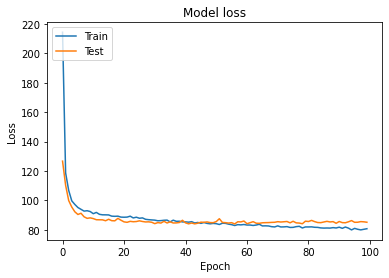

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(r'D:/Resit/Data/features/points/BPNN.jpg', dpi=400,bbox_inches = 'tight')
plt.show()

In [73]:
a=y_test.reshape(-1)
b=predicts.reshape(-1)
results = {}
coeffs = np.polyfit(a, b, 2)
# Polynomial Coefficients
results['polynomial'] = coeffs.tolist()
correlation = np.corrcoef(a, b)[0, 1]
# r
results['correlation'] = correlation
# r-squared
results['determination'] = correlation ** 2
print(results["determination"])

0.4343193044740015


In [74]:
MSE=np.mean((a-b)**2)                                            
print('MSE=%f'%MSE) #5.13
rmse = MSE**0.5
print ('RMSE= ', rmse)

MSE=85.078266
RMSE=  9.223788072372768


In [99]:
RF = RandomForestRegressor(random_state=1,n_estimators=390 , max_features = 'sqrt',max_depth = 100)
model = RF.fit(x_train, y_train)
predict_y_validation = model.predict(x_test)
result = pd.DataFrame()

MSE=np.mean((y_test-predict_y_validation)**2)                                            
print('MSE=%f'%MSE) #5.13
rmse = MSE**0.5
print ('RMSE= ', rmse)
r2 = r2_score(y_test, predict_y_validation) 
print('R2 =',r2 )
std = np.std(y_test,ddof=1)
rpd = std/rmse
print ('RPD= ', rpd)

<ipython-input-99-e42531870009>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RF.fit(x_train, y_train)


MSE=212.342221
RMSE=  14.571966953983315
R2 = 0.4515266217483268
RPD=  0.8392600346105653


In [98]:
svr = SVR(C=1000, kernel= 'rbf')
model = svr.fit(x_train, y_train)
predict_y_validation_svr = model.predict(x_test)
result = pd.DataFrame()

MSE=np.mean((y_test-predict_y_validation_svr)**2)                                            
print('MSE=%f'%MSE) #5.13
rmse = MSE**0.5
print ('RMSE= ', rmse)
r2 = r2_score(y_test, predict_y_validation_svr) 
print('R2 =',r2 )

C:\ProgramData\Anaconda3\envs\geospatial\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MSE=259.758196
RMSE=  16.11701572287883
R2 = 0.31616228816762604


In [100]:
import seaborn as sns
dataset = pd.read_csv("results.csv",encoding = 'UTF-8')  
print(dataset)

      y_test     result model
0       11.8  18.913077    RF
1       13.1  18.656923    RF
2       14.0  20.546154    RF
3       47.2  17.102308    RF
4       16.4  11.222051    RF
...      ...        ...   ...
3223    53.2  42.414901   SVR
3224     8.8  12.523470   SVR
3225    22.6  14.664759   SVR
3226    21.1  20.885152   SVR
3227     6.4  14.191545   SVR

[3228 rows x 3 columns]


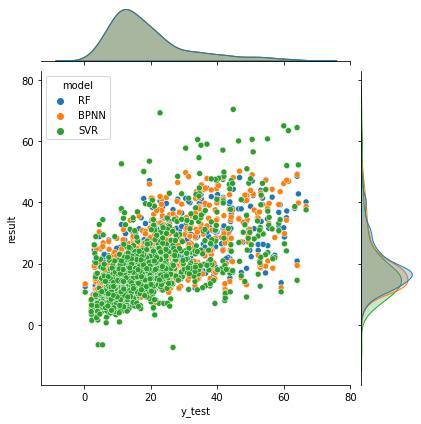

In [101]:
sns.jointplot(data=dataset, x="y_test", y="result", hue="model")

      test       bpnn         rf        svr
0     11.8  19.252691  18.913077  12.068439
1     13.1  19.741121  18.656923   8.958832
2     14.0  17.558796  20.546154  13.845892
3     47.2  15.397876  17.102308  16.006071
4     16.4  11.125585  11.222051  12.492320
...    ...        ...        ...        ...
1071  53.2  42.062847  33.768974  42.414901
1072   8.8  16.884243  16.494103  12.523470
1073  22.6  19.182028  21.250000  14.664759
1074  21.1  12.544991  21.736667  20.885152
1075   6.4  10.257236  12.618462  14.191545

[1076 rows x 4 columns]


In [89]:
test.to_csv('result.csv',index = None,encoding = 'utf8')